In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


1)	Please load lines 100,001 through 120,000 of this file. That means you’re not loading the first 100,000 lines, but then getting the next 20,000. (There’s nothing special about this subset, and it’s not intended to be representative—it’s just what we’re working with for this exercise)

In [2]:
df = pd.DataFrame(columns=['wine_name','wine_wineId','wine_variant','wine_year',\
                               'review_points','review_time','review_userId',\
                               'review_userName','review_text'])

In [3]:
f=open('cellartracker.txt', encoding='latin-1')
for line in f.readlines()[100000:120000]:
    if 'wine/name' in line:
        wine_name=str(line).split(':')[1].strip()
    elif 'wine/wineId' in line:
        wine_wineId=int(str(line).split(':')[1].strip())
    elif 'wine/variant' in line:
        wine_variant=str(line).split(':')[1].strip()
    elif 'wine/year' in line:
        wine_year=str(line).split(':')[1].strip() 
    elif 'review/points' in line:
        review_points=str(line).split(':')[1].strip() 
    elif 'review/time' in line:
        review_time=str(line).split(':')[1].strip() 
    elif 'review/userId' in line:
        review_userId=str(line).split(':')[1].strip() 
    elif 'review/userName' in line:
        review_userName=str(line).split(':')[1].strip()
    elif 'review/text' in line:
        review_text=str(line).split(':')[1].strip()
        df=df.append({'wine_name':wine_name, 'wine_wineId':wine_wineId,\
                             'wine_variant':wine_variant,'wine_year':wine_year,\
                             'review_points':review_points,'review_time':review_time,\
                             'review_userId':review_userId,\
                              'review_userName':review_userName,'review_text':review_text},ignore_index=True) 
               
f.close()

2) Convert the data from “key: value” format to a standard data structure of your choice

In [5]:
df.to_csv(path_or_buf="data_frame.csv", index=False)

In [3]:
df=pd.read_csv('data_frame.csv')


In [70]:
df.head(5)

,wine_name,wine_wineId,wine_variant,wine_year,review_points,review_time,review_userId,review_userName,review_text
0,1999 Fattoria di F&#232;lsina Berardenga Fonta...,7901,Sangiovese,1999.0,84.0,1251676800,34,Lorien,drink up
1,2000 Ruffino Vino Nobile di Montepulciano Lodo...,52531,Sangiovese,2000.0,89.0,1220572800,34,Lorien,"3 years later and still singing, only now with..."
2,1996 Bodegas del Marqu&#233;s de Vargas Rioja ...,4240,"Tempranillo Blend, Tempranillo",1996.0,90.0,1289692800,34,Lorien,Very nice! Ready and glowing right now. Beauti...
3,2000 Descendientes de Jos&#233; Palacios Bierz...,5383,Menc&#237;a,2000.0,93.0,1072656000,34,Lorien,Dark ruby red. Interesting and good aromas of ...
4,1997 Alvaro Palacios Priorat Finca Dof&#237;,4568,Red Blend,1997.0,80.0,1107475200,34,Lorien,Well it was going to happen one day and it did...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
wine_name          2000 non-null object
wine_wineId        2000 non-null int64
wine_variant       2000 non-null object
wine_year          1980 non-null float64
review_points      1535 non-null float64
review_time        2000 non-null int64
review_userId      2000 non-null int64
review_userName    2000 non-null object
review_text        2000 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 140.7+ KB


In [5]:
df.describe()

,wine_wineId,wine_year,review_points,review_time,review_userId
count,2.000000e+03,1980.000000,1535.000000,2.000000e+03,2000.0000
mean,2.553898e+05,2000.762626,89.872313,1.219252e+09,826.6160
std,3.003486e+05,6.664274,2.843022,7.833533e+07,10124.7419
min,3.000000e+00,1945.000000,70.000000,8.458560e+08,34.0000
25%,2.165700e+04,1999.000000,88.000000,1.149293e+09,40.0000
50%,1.259100e+05,2002.000000,90.000000,1.226102e+09,40.0000
75%,4.141278e+05,2005.000000,91.000000,1.289347e+09,42.0000
max,1.424800e+06,2011.000000,100.000000,1.348013e+09,131113.0000


In [6]:
df=df.drop_duplicates()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 9 columns):
wine_name          2000 non-null object
wine_wineId        2000 non-null int64
wine_variant       2000 non-null object
wine_year          1980 non-null float64
review_points      1535 non-null float64
review_time        2000 non-null int64
review_userId      2000 non-null int64
review_userName    2000 non-null object
review_text        2000 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 156.2+ KB


3) How many unique users are represented in this subset?

In [8]:
print ('Number of unique user names:', df['review_userName'].nunique())
print ('Number of unique user IDs:', df['review_userId'].nunique())


Number of unique user names: 9
Number of unique user IDs: 9


There are 9 users represented in this subset. 

4) For each user: 
•how many reviews did they submit?
•what was the mean and standard deviation of their wine rating (review_points)?
•how many different kinds of wine (wine_variant) did they review?


In [9]:
table1 = df.groupby(['review_userName'])[['review_text','review_points']].count()

table1.reset_index()



,review_userName,review_text,review_points
0,Decaturwinedude,1063,930
1,JamieMc,1,1
2,JeffO,38,27
3,Jeury,2,2
4,Lorien,54,50
5,Rani,691,514
6,RickG,141,4
7,bwhitney,3,2
8,mknudtson,7,5


As we can see from the table above, most of the reviewers submitted more text reviews than review points. In this specific sample, Decaturwinedude and Rani submitted more reviews and review points than any other reviewer in the subset.

In [10]:
table2=df.groupby('review_userName')['review_points'].agg([np.mean,np.std]).round(2)
table2.reset_index()

,review_userName,mean,std
0,Decaturwinedude,89.38,2.27
1,JamieMc,80.00,NaN
2,JeffO,94.37,3.94
3,Jeury,91.00,1.41
4,Lorien,89.96,5.15
5,Rani,90.60,2.93
6,RickG,89.75,1.50
7,bwhitney,90.00,1.41
8,mknudtson,84.20,6.42


JeffO left the highest average review score. It is possible that JeffO prefer better quality wine but it is also possible that JeffO tends to assign higher review points in general.

In [11]:
table3= df.groupby(['review_userName'])['wine_variant'].count().sort_values().to_frame('kinds of wine')
table3=table3.reset_index()

In [12]:
table3

,review_userName,kinds of wine
0,JamieMc,1
1,Jeury,2
2,bwhitney,3
3,mknudtson,7
4,JeffO,38
5,Lorien,54
6,RickG,141
7,Rani,691
8,Decaturwinedude,1063


Decaturwinedude(1063) and Rani(691) evaluated more wine types than any other reviewer in the sample, followed by EickG(141), Lorien(54), JeffO(38), mknudtson(7), bwhitney(3), Jeury(2), and JamieMc(1)

5)	Please graphically plot review_points vs. wine_year. Anything to observe about this relationship? Is it the same for all users?

In [64]:
table4 = df.groupby(['review_userName'])[['review_points']].count().sort_values('review_points',ascending=False).reset_index()

colors = {'JamieMc' : 'k', 
          'Jeury' : 'm', 
          'bwhitney' : 'indigo', 
          'mknudtson' : 'Maroon', 
          'JeffO' : 'coral', 
          'RickG':'darkslategrey',
          'Lorien' : 'teal', 
          'Rani' : 'grey', 
          'Decaturwinedude' : 'y'}

genre_list = list(table4['review_userName'])

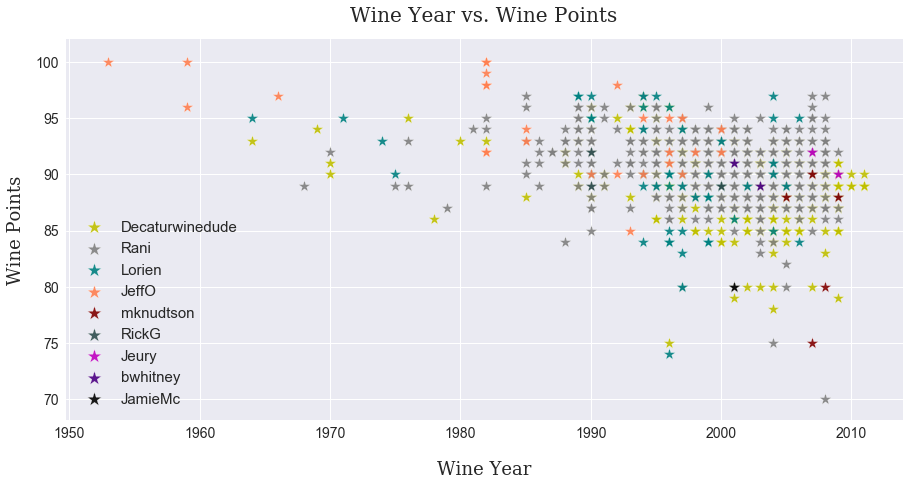

In [65]:
plt.style.use('ggplot')

sns.set(font_scale=1.4)
df_copy=df.copy()

fig, ax = plt.subplots(figsize=(15,7))
for i in genre_list:
    y = df_copy[df_copy['review_userName'] == i]
    ax.scatter(y['wine_year'],y['review_points'] , color = colors[i],s=150,\
    label = i, alpha=.9, edgecolor='white', marker='*')
    
plt.xlabel('Wine Year',fontsize=18, labelpad=20,family="serif")
plt.ylabel('Wine Points',fontsize=18, labelpad=10,family="serif")
plt.title('Wine Year vs. Wine Points', fontsize = 20,y=1.03,family="serif")
plt.legend(genre_list,loc='best', fontsize = 15,markerscale=1.2)

plt.show()

Decaturwinedude,, Rani, and Lorien are more likely to review younger wines but they also like occasionally to review older wines, produced since mid 60s. JeffO, on the other hand, is more likely to enjoy reviewing much older wines, produced since 50s,  and does not review wines that are produced after the year of 2000. I assume that JeffO has more financial resources to enjoy older wines as the older wines are usually more expensive. RickG, mknudtson, Jeury, bwhitney, JamieMc seem to be occasional wine lovers as they reviewed less than 5 wine types in the sample that are the younger side. However, it is also possible that the sample does not include all the reviews from the latter individuals.  